In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [4]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [5]:
#First we are droping EmployeeCount,StandardHours because they didn't any effect on model
df.drop(['StandardHours','EmployeeCount'],axis=1,inplace=True)

In [6]:
df.shape

(1470, 33)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

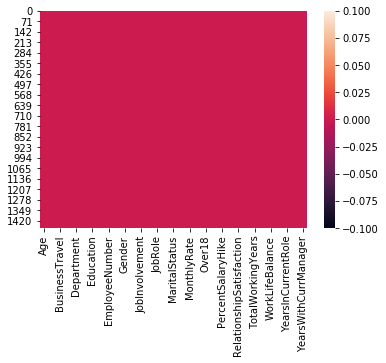

In [9]:
sns.heatmap(df.isnull())

from above heatmap we conclude there is no null value in dataset.

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Observations:
1)High standard deviation Daily Rate,Employee Number,HourlyRate present for means data spread to much
2)mean is greater than median it means data is right skewed and vice versa left skewed (column with skewness DistanceFromHome,YearsWithCurrManager)
3)If large gap between 75 percentile and max means outlier is present in that column(DistanceFromHome,EmployeeNumber,DailyRate)

# Data Visualization 

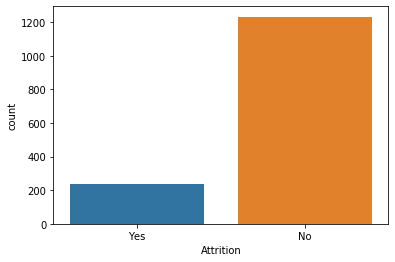

In [11]:
sns.countplot(df['Attrition'])

Around 1200 Hr having NO attrition 

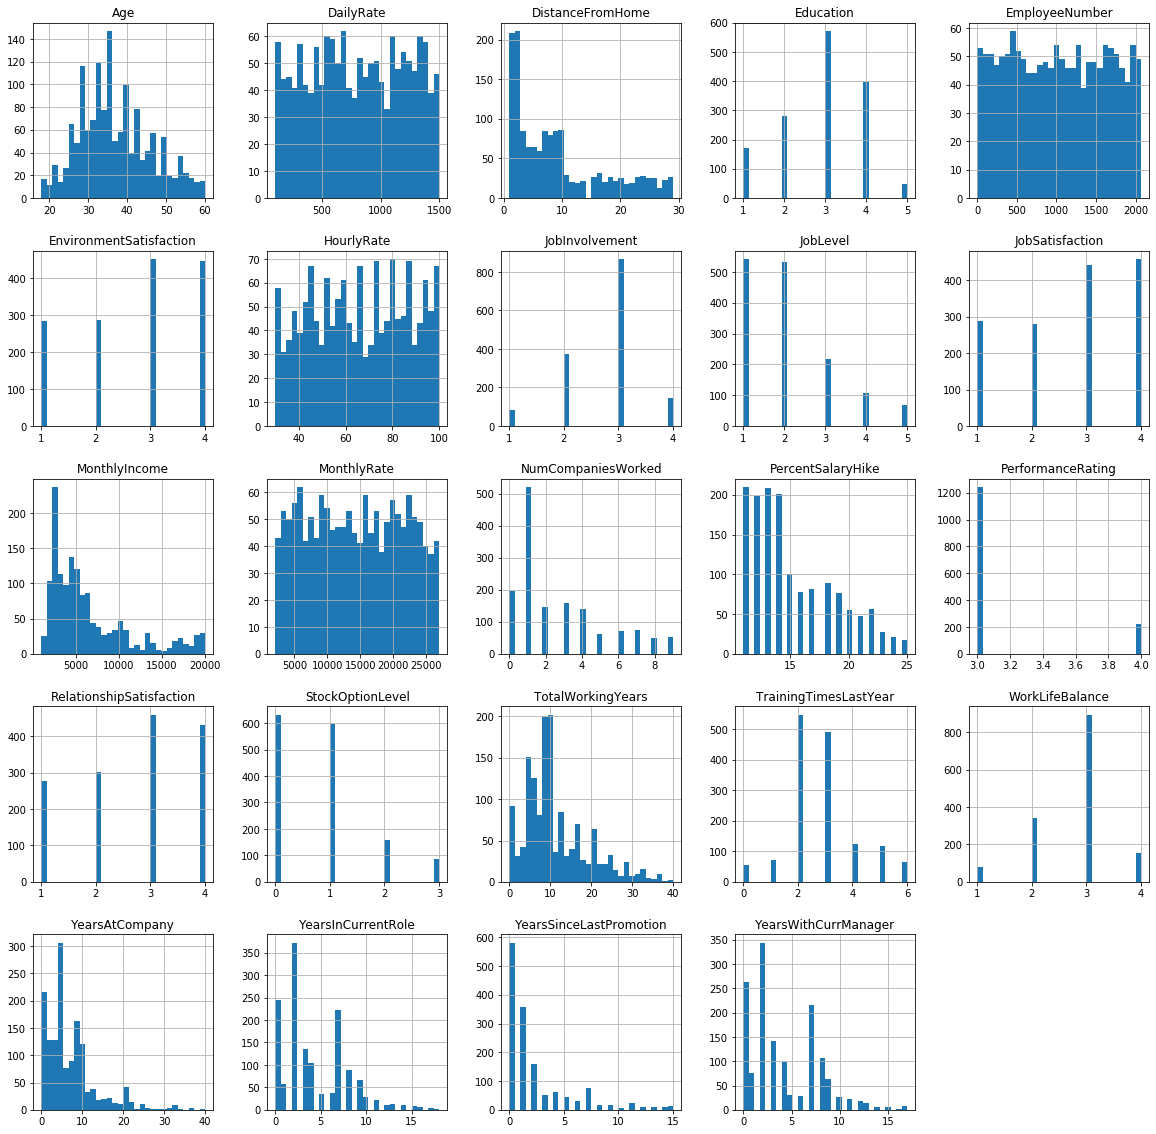

In [12]:
df.hist(bins = 30, figsize=(20,20));

Maximum age in between 30 to 40
Maximum distance from home in between 0 to 3 km
Maximum salary hike between 0 to 15%

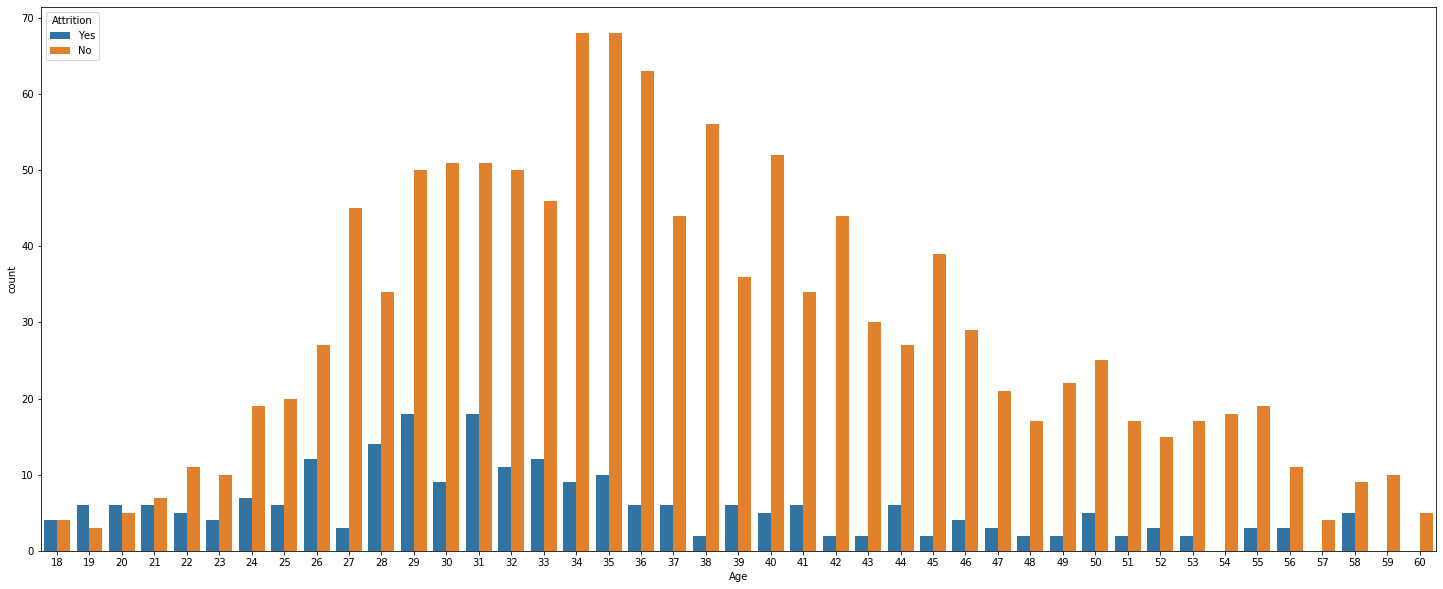

In [13]:
plt.figure(figsize=[25,10])
sns.countplot(x = 'Age', hue = 'Attrition', data=df)

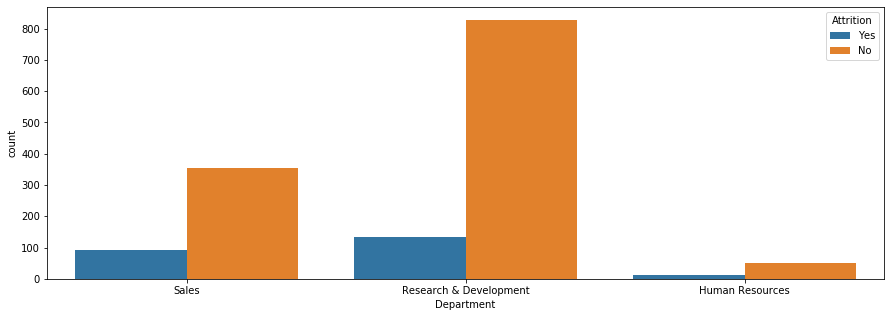

In [14]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Department', hue= 'Attrition', data=df)

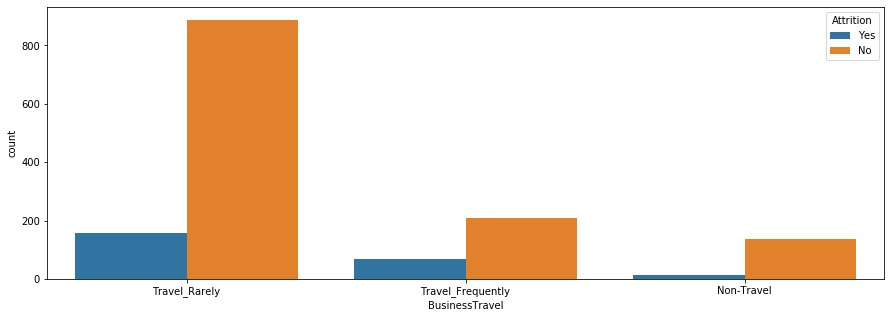

In [15]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'BusinessTravel', hue= 'Attrition', data=df)

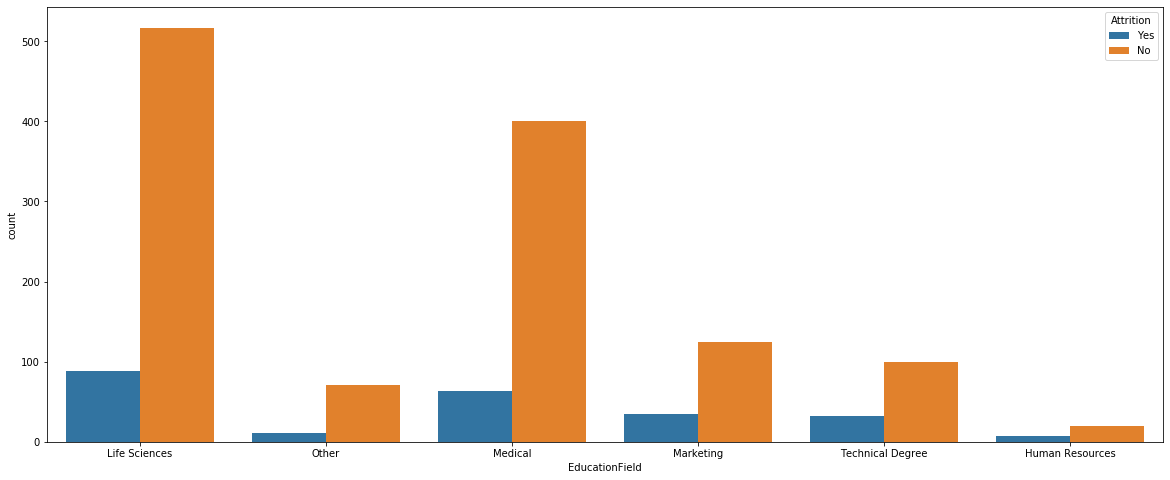

In [16]:
plt.figure(figsize=[20,8])
sns.countplot(x = 'EducationField', hue= 'Attrition', data=df)

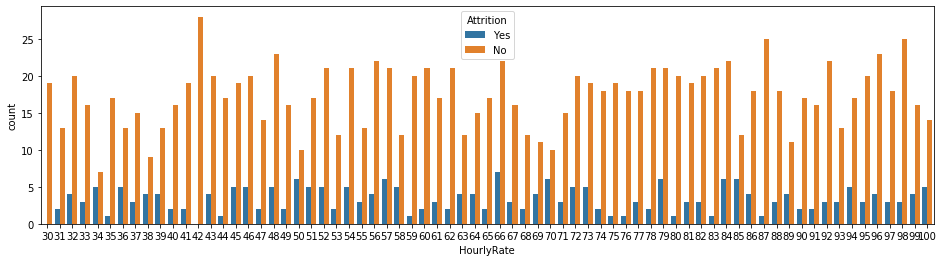

In [17]:
plt.figure(figsize=(16,4))
sns.countplot(x='HourlyRate', hue='Attrition', data=df)

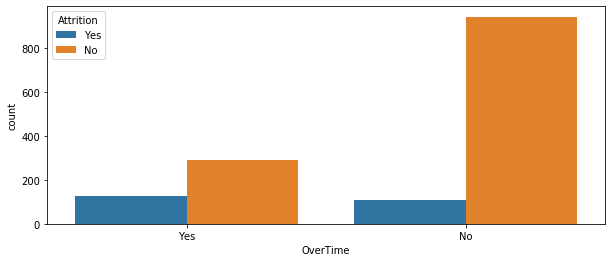

In [18]:
plt.figure(figsize=(10,4))
sns.countplot(x='OverTime', hue='Attrition', data=df)

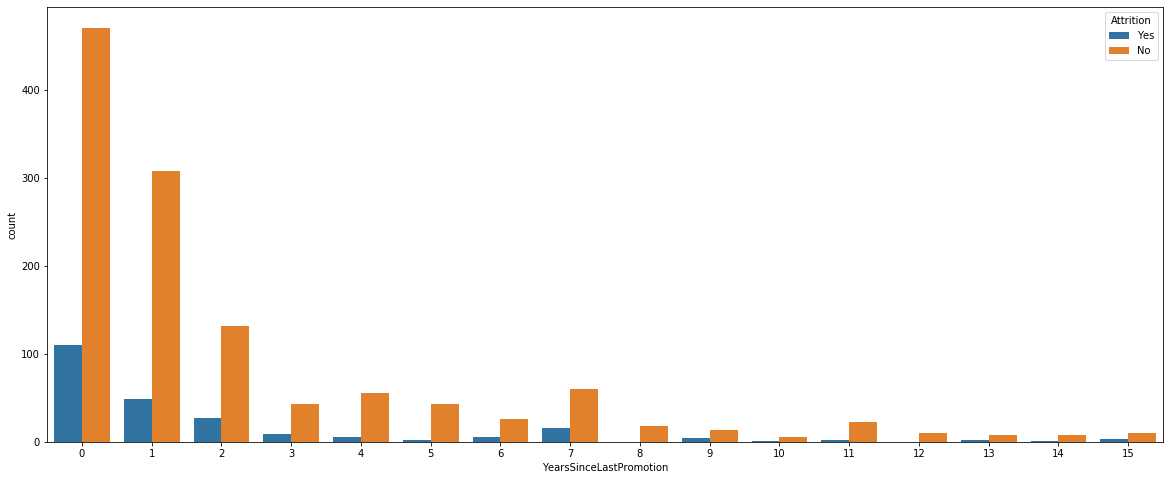

In [19]:
plt.figure(figsize=(20,8))
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=df)

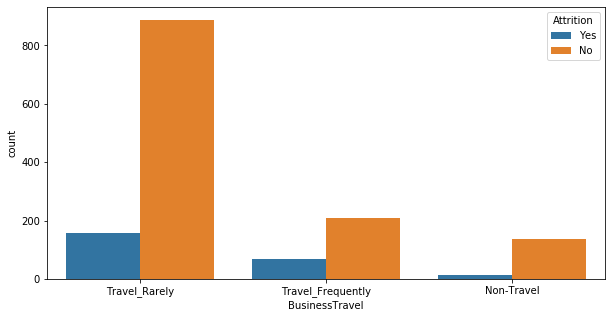

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='BusinessTravel', hue='Attrition', data=df)

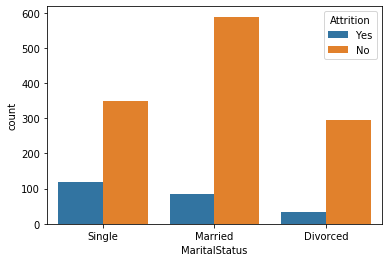

In [21]:
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)

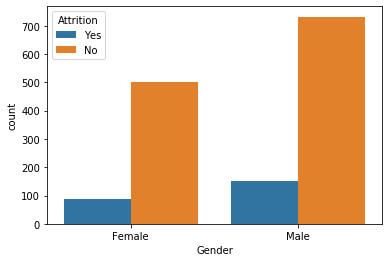

In [22]:
sns.countplot(x='Gender', hue='Attrition', data=df)

In [23]:
df.drop(['Over18','EmployeeNumber'],axis=1,inplace=True)
#these 2 column not also that much usefull

In [24]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [25]:
lst=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
for i in lst:
    print(i,'=',df[i].unique())

BusinessTravel = ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department = ['Sales' 'Research & Development' 'Human Resources']
EducationField = ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender = ['Female' 'Male']
JobRole = ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus = ['Single' 'Married' 'Divorced']


In [26]:
travel=pd.get_dummies(df['BusinessTravel'],drop_first=True)
dpt=pd.get_dummies(df['Department'],drop_first=True)
efield=pd.get_dummies(df['EducationField'])
gender=pd.get_dummies(df['Gender'],drop_first=True)
role=pd.get_dummies(df['JobRole'])
status=pd.get_dummies(df['MaritalStatus'],drop_first=True)

In [27]:
df=pd.concat([df,travel,dpt,efield,gender,role,status],axis=1)

In [28]:
df.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'],axis=1,inplace=True)


In [29]:
le=LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])
df['OverTime']=le.fit_transform(df['OverTime'])

In [30]:
df = df.loc[:, ~df.columns.duplicated()]

In [31]:
dfcor=df.corr()

In [32]:
dfcor

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,Healthcare Representative,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.098825,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.083919,-0.119185
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,...,-0.078696,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.090984,0.175419
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.040141,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.040035,-0.075835
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.022916,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994,0.030232,-0.027445
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,0.024270,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.001865,0.004168
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,0.014090,-0.001533,0.010730,0.059178,-0.048689,0.001940,-0.024421,0.002949,-0.022180,0.009035
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,0.014599,0.018028,0.012659,-0.014394,-0.025128,0.020034,-0.011886,-0.018703,0.036432,-0.033436
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,0.001272,-0.022724,0.017112,-0.021939,0.015200,0.047604,-0.011413,-0.027282,0.028324,-0.045253
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,0.115704,-0.344608,0.552744,0.114896,0.414319,-0.387788,0.127490,-0.216559,0.050547,-0.087072
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.016367,-0.015710,-0.005620,-0.013747,-0.006217,0.020503,0.012604,0.001413,-0.010315,0.024571


correlation is nutral

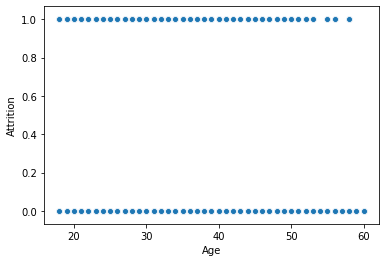

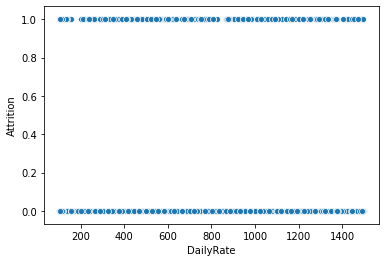

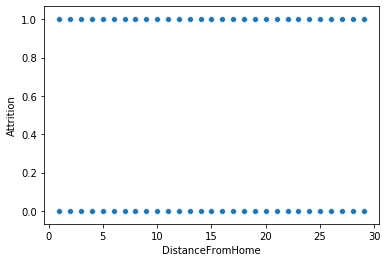

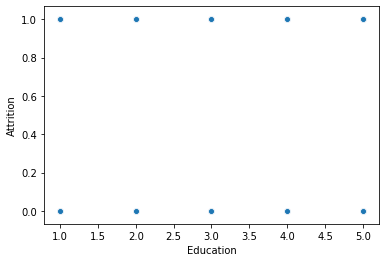

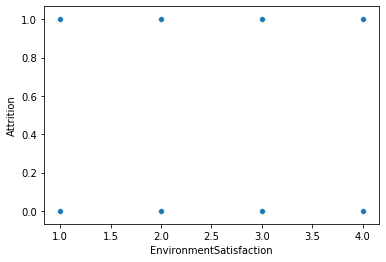

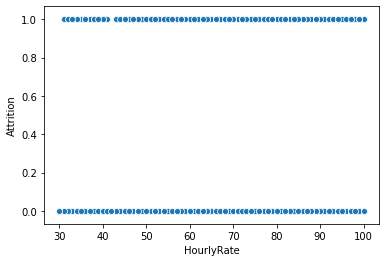

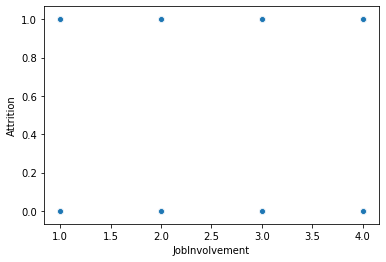

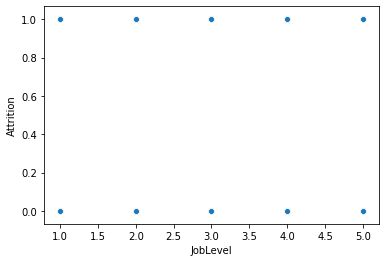

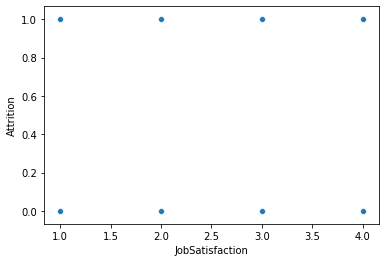

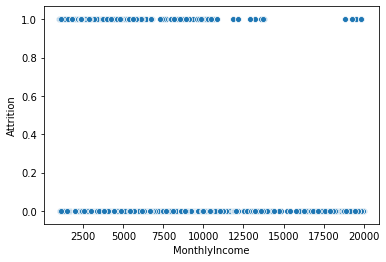

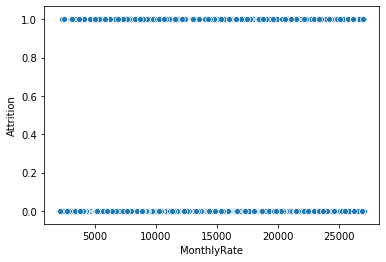

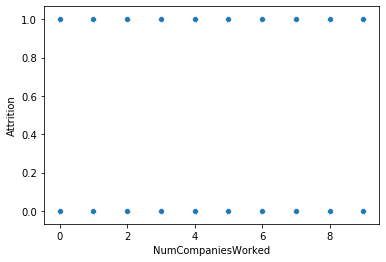

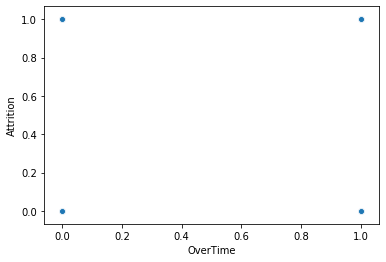

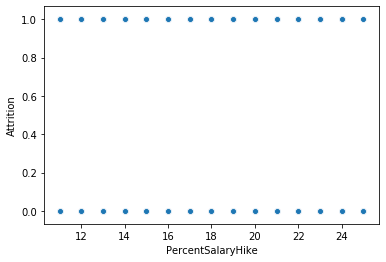

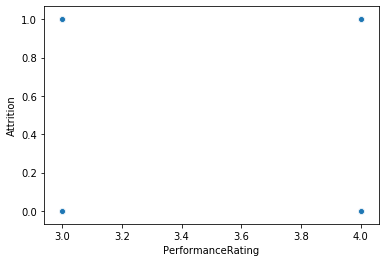

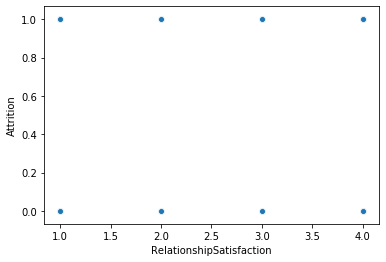

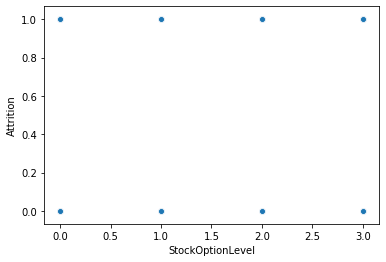

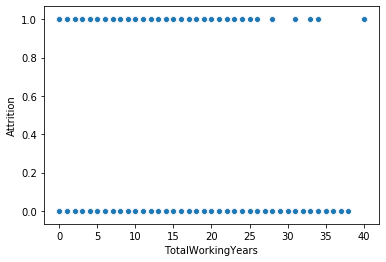

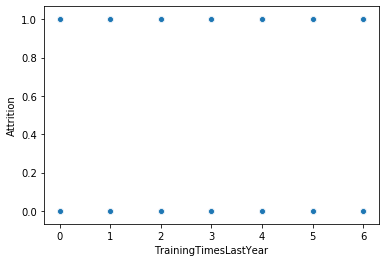

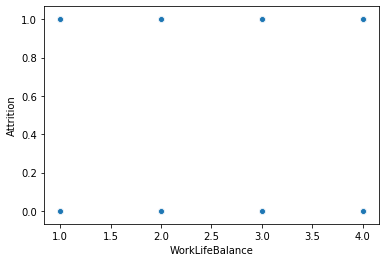

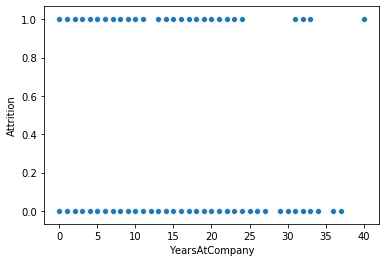

In [33]:
lst=['Age','DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany']
for i in lst:
    plt.figure(i)
    sns.scatterplot(x=df[i],y=df['Attrition'])

In [34]:
df.skew()

Age                          0.413286
Attrition                    1.844366
DailyRate                   -0.003519
DistanceFromHome             0.958118
Education                   -0.289681
EnvironmentSatisfaction     -0.321654
HourlyRate                  -0.032311
JobInvolvement              -0.498419
JobLevel                     1.025401
JobSatisfaction             -0.329672
MonthlyIncome                1.369817
MonthlyRate                  0.018578
NumCompaniesWorked           1.026471
OverTime                     0.964489
PercentSalaryHike            0.821128
PerformanceRating            1.921883
RelationshipSatisfaction    -0.302828
StockOptionLevel             0.968980
TotalWorkingYears            1.117172
TrainingTimesLastYear        0.553124
WorkLifeBalance             -0.552480
YearsAtCompany               1.764529
YearsInCurrentRole           0.917363
YearsSinceLastPromotion      1.984290
YearsWithCurrManager         0.833451
Travel_Frequently            1.595067
Travel_Rarel

In [35]:
lst=['Human Resources','Manager','Other']
df[i]=np.log(df[i])

In [36]:
df.skew()

Age                          0.413286
Attrition                    1.844366
DailyRate                   -0.003519
DistanceFromHome             0.958118
Education                   -0.289681
EnvironmentSatisfaction     -0.321654
HourlyRate                  -0.032311
JobInvolvement              -0.498419
JobLevel                     1.025401
JobSatisfaction             -0.329672
MonthlyIncome                1.369817
MonthlyRate                  0.018578
NumCompaniesWorked           1.026471
OverTime                     0.964489
PercentSalaryHike            0.821128
PerformanceRating            1.921883
RelationshipSatisfaction    -0.302828
StockOptionLevel             0.968980
TotalWorkingYears            1.117172
TrainingTimesLastYear        0.553124
WorkLifeBalance             -0.552480
YearsAtCompany                    NaN
YearsInCurrentRole           0.917363
YearsSinceLastPromotion      1.984290
YearsWithCurrManager         0.833451
Travel_Frequently            1.595067
Travel_Rarel

In [37]:
df.drop('YearsAtCompany',inplace=True,axis=1)

In [38]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,Healthcare Representative,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,40,3,1,2,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,...,0,1,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,4,42,2,3,1,...,1,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,2,87,4,2,2,...,0,0,0,1,0,0,0,0,1,0
1468,49,0,1023,2,3,4,63,2,2,2,...,0,0,0,0,0,0,1,0,1,0


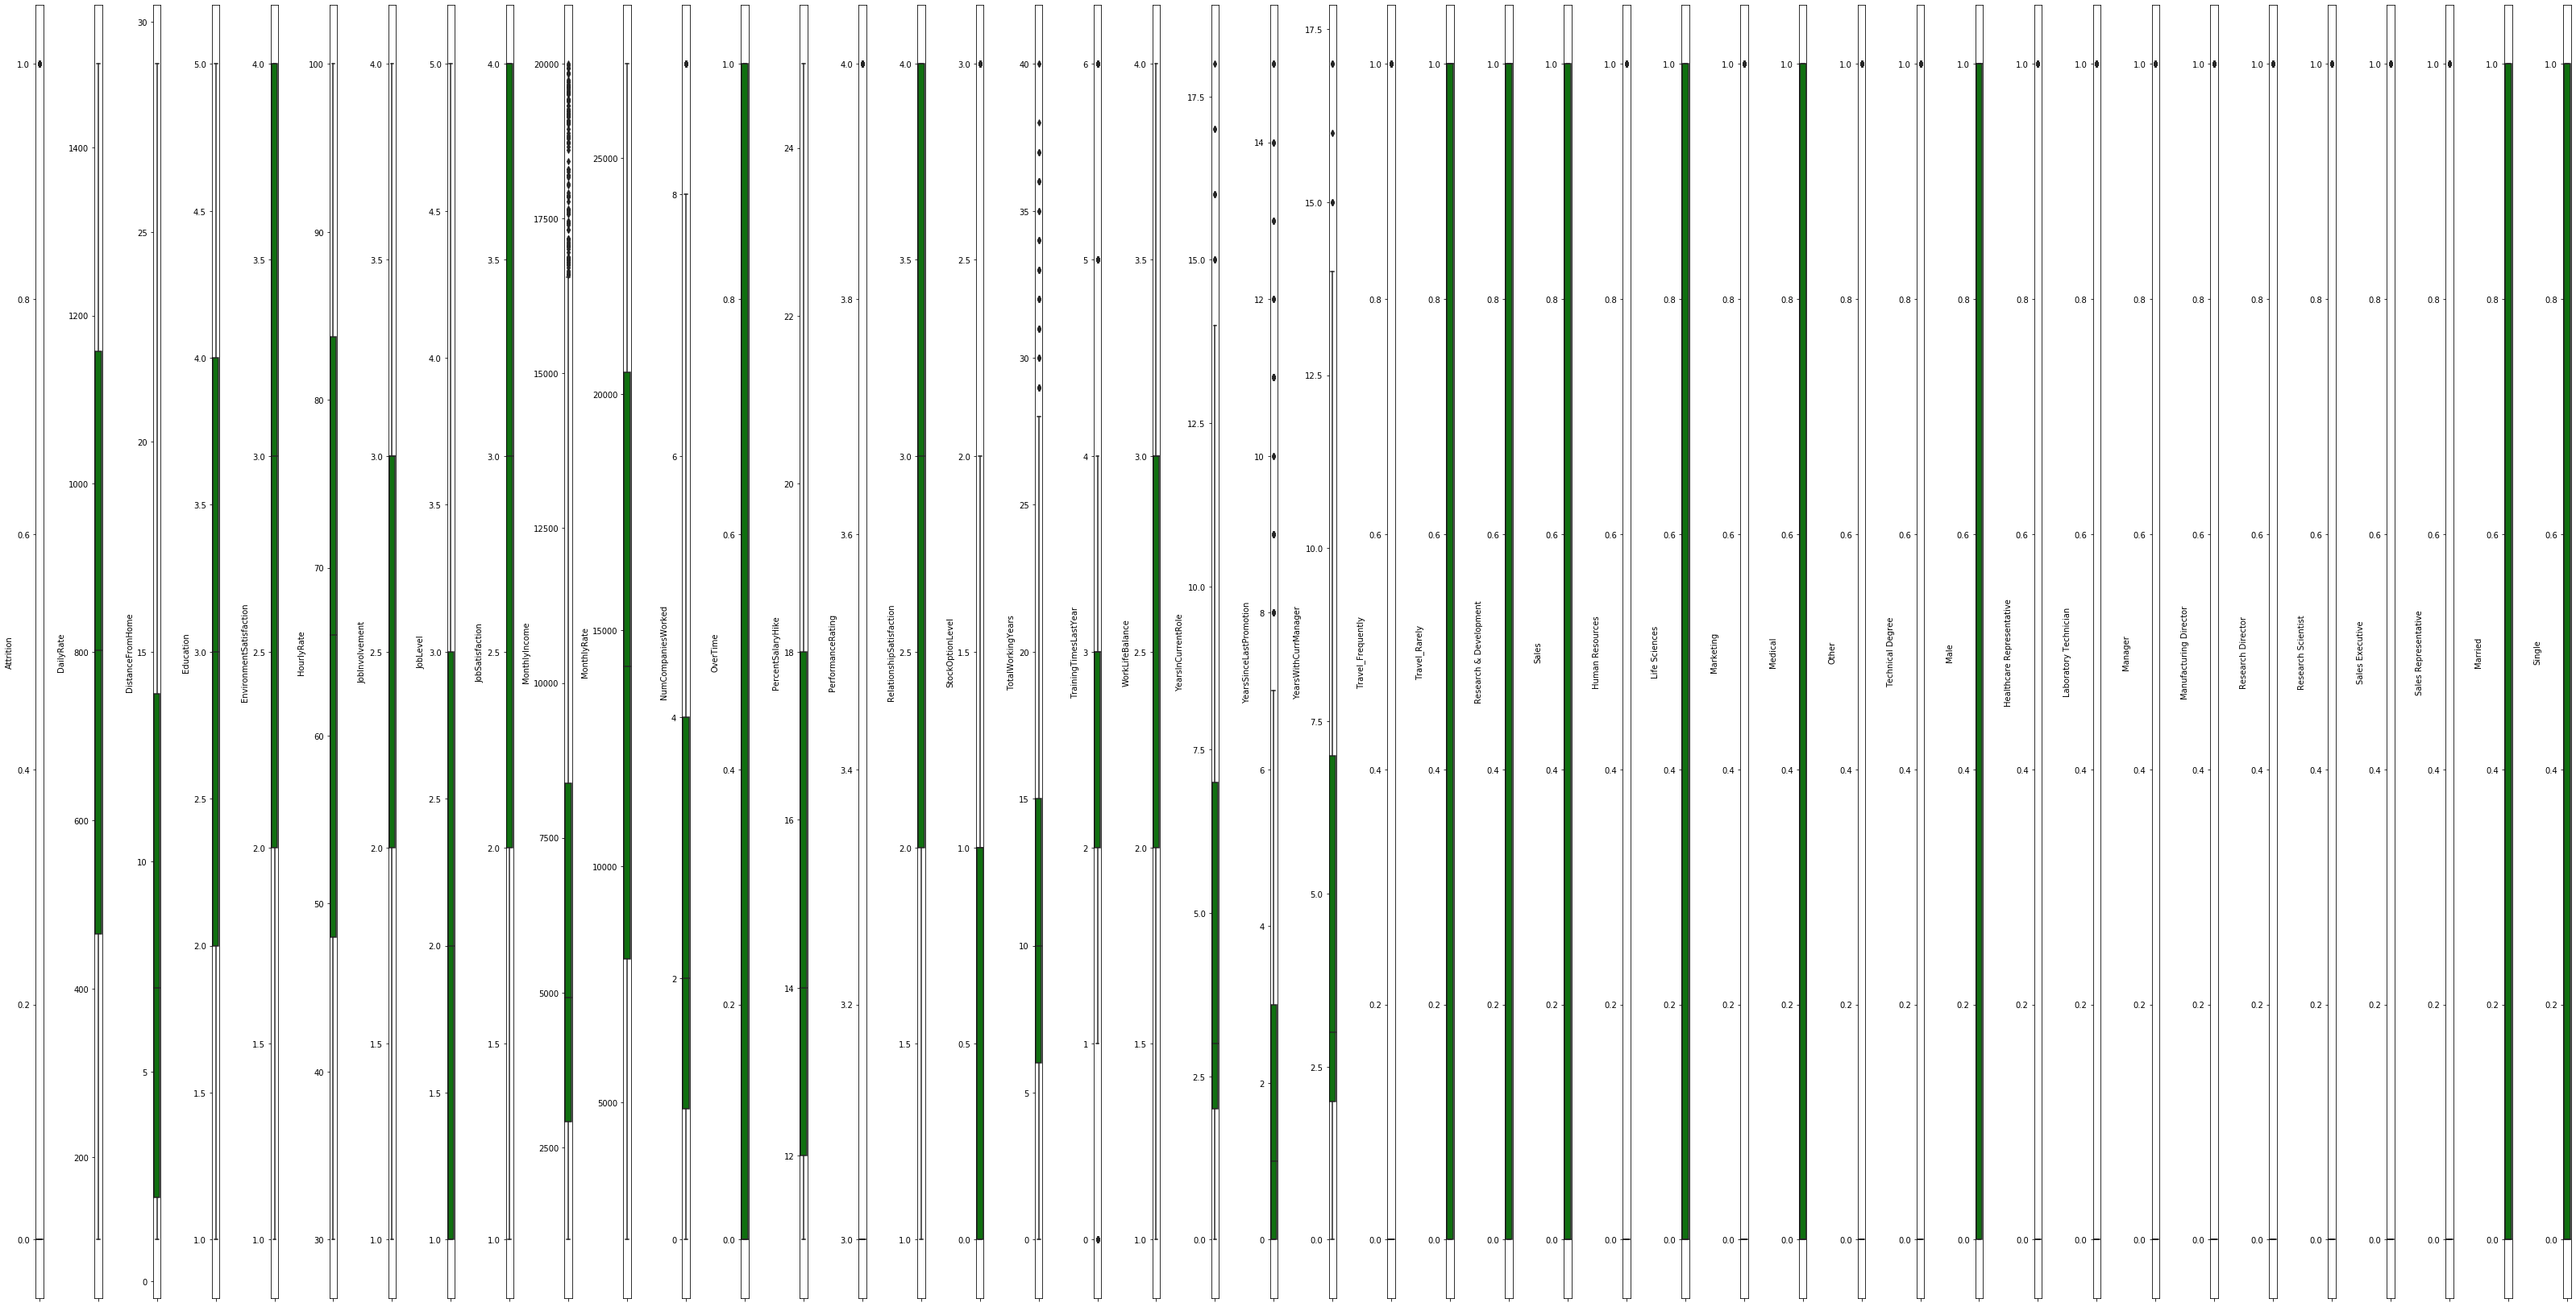

In [39]:
collist=df.columns.values
ncol=45
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Removing Outliers

In [40]:
z=np.abs(zscore(df))

In [41]:
z

array([[0.4463504 , 2.28090588, 0.74252653, ..., 0.24462499, 0.91892141,
        1.45864991],
       [1.32236521, 0.4384223 , 1.2977746 , ..., 0.24462499, 1.08823234,
        0.68556546],
       [0.008343  , 2.28090588, 1.41436324, ..., 0.24462499, 0.91892141,
        1.45864991],
       ...,
       [1.08667552, 0.4384223 , 1.60518328, ..., 0.24462499, 1.08823234,
        0.68556546],
       [1.32236521, 0.4384223 , 0.54667746, ..., 0.24462499, 1.08823234,
        0.68556546],
       [0.32016256, 0.4384223 , 0.43256792, ..., 0.24462499, 1.08823234,
        0.68556546]])

In [42]:
threshold=3
print(np.where(z>3))

(array([   2,    8,    9,   15,   18,   20,   20,   21,   22,   25,   25,
         28,   28,   29,   31,   31,   33,   33,   36,   37,   40,   45,
         45,   45,   51,   53,   55,   59,   60,   62,   62,   63,   64,
         64,   64,   65,   66,   75,   77,   77,   78,   84,   85,   85,
         86,   86,   88,   90,   93,   95,   95,   96,   98,  100,  103,
        104,  105,  105,  106,  110,  110,  112,  112,  116,  117,  119,
        123,  123,  123,  123,  125,  126,  126,  126,  127,  128,  129,
        135,  136,  139,  142,  145,  147,  152,  153,  155,  155,  156,
        159,  163,  165,  170,  171,  171,  178,  182,  184,  186,  187,
        187,  187,  188,  189,  190,  190,  192,  194,  197,  198,  199,
        199,  200,  200,  201,  204,  208,  209,  211,  213,  214,  215,
        217,  218,  222,  222,  224,  226,  231,  231,  231,  231,  233,
        235,  237,  237,  238,  243,  244,  244,  245,  247,  249,  250,
        251,  251,  255,  257,  262,  263,  263,  

In [43]:
df.shape

(1470, 45)

In [44]:
df_new=df[(z<3).all(axis=1)]

In [45]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [47]:
print(x_train.shape,'\t',x_test.shape)

(1029, 44) 	 (441, 44)


In [48]:
print(y_train.shape,'\t',y_test.shape)

(1029,) 	 (441,)


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [50]:
model=[LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),MultinomialNB()]
for m in model:
    print(m)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score',accuracy_score(y_test,pred))
    print('Confusion Metrix\n',confusion_matrix(y_test,pred))
    print('Classification report\n',classification_report(y_test,pred))
    print('***********************************************************************************')
    print('\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy score 0.8616780045351474
Confusion Metrix
 [[380   0]
 [ 61   0]]
Classification report
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441

***********************************************************************************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-

In [51]:
#from sklearn.model_selection import GridSearchCV
#param={'kernel':['linear','rbf'],'C':[1,10]}
#gd_dt=GridSearchCV(estimator=model[1],param_grid=param)
#gd_dt.fit(x,y)
#bestparam=gd_dt.best_params_
#print(bestparam)
#bestresult=gd_dt.best_score_
#print(bestresult)

In [53]:
from sklearn.model_selection import cross_val_score
svscore=cross_val_score(model[1],x,y,cv=7)
print('cross validation=',svscore)
print(svscore.mean(),svscore.std())

cross validation= [0.83809524 0.83809524 0.83809524 0.83809524 0.83809524 0.83809524
 0.84285714]
0.8387755102040816 0.0016663195529137205


In [54]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Accuracy score',accuracy_score(y_test,pred))
print('Confusion Metrix\n',confusion_matrix(y_test,pred))
print('Classification report\n',classification_report(y_test,pred))

Accuracy score 0.8662131519274376
Confusion Metrix
 [[377   3]
 [ 56   5]]
Classification report
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.62      0.08      0.14        61

    accuracy                           0.87       441
   macro avg       0.75      0.54      0.54       441
weighted avg       0.84      0.87      0.82       441



In [55]:
rfscore=cross_val_score(rf,x,y,cv=7)
print('cross validation=',rfscore)
print(rfscore.mean(),rfscore.std())

cross validation= [0.86190476 0.85238095 0.86666667 0.86666667 0.84285714 0.85714286
 0.85714286]
0.8578231292517006 0.007815731491888491


In [60]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
CV_rf.fit(x, y)
bestparam=CV_rf.best_params_
print(bestparam)
bestresult=CV_rf.best_score_
print(bestresult)

{'max_features': 'auto', 'n_estimators': 200}
0.8612244897959183


In [57]:
import joblib
joblib.dump(rf,'RF_Hr.pkl')

['RF_Hr.pkl']